In [31]:
import os
import subprocess
import numpy as np
import matplotlib.pyplot as plt
import utils as ut

system_name = 'kite3d_vrel'
run_name = 'nac'
data_dir = '../data/'+system_name+'/'+run_name+'/'
plot_dir = '../plots/'+system_name+'/'+run_name+'/'

## Evaluate the 3d kite

In [32]:
params = dict()

# EVALUATION PARAMETERS
params['ep_length'] = 200 # sec
params['ev_time'] = 200 # sec
params['traj_points'] = 1000
params['gamma'] = 1

In [33]:
# WRITING THE PARAMETERS
ut.write_params(params, data_dir, 'param_ev.txt')
#ut.write_params(env_params, data_dir, 'param_env.txt')

In [34]:
# COMPILING C++ SCRIPT
comp_list = np.array(["g++", "-o", "evaluate.exe", "evaluate.cpp", "../lib/eval.cpp", "../lib/utils.cpp", "../lib/wind.cpp", 
                      "../lib/envs/kite.cpp", "../lib/envs/kite2d.cpp", "../lib/envs/kite3d.cpp", "-std=c++17"])
comp_str = ""
for s in comp_list: comp_str+=s+" "
print('To compile from terminal: ')
print(comp_str)

To compile from terminal: 
g++ -o evaluate.exe evaluate.cpp ../lib/eval.cpp ../lib/utils.cpp ../lib/wind.cpp ../lib/envs/kite.cpp ../lib/envs/kite2d.cpp ../lib/envs/kite3d.cpp -std=c++17 


In [35]:
f = open(data_dir + "ev_states.txt", "r")
st_traj = []
st_labels = f.readline().split()
for line in f.readlines():
    st_traj.append(line.split())
st_traj = np.array(st_traj, dtype='float')
#st_traj = np.loadtxt(data_dir + system_name + '/' + run_name + "/ev_states.txt", dtype='float')

traj_x=st_traj[:,0]
traj_y=st_traj[:,1]
traj_z=st_traj[:,2]

In [36]:
xs = np.linspace(0, params['ev_time'], num=len(st_traj[:,0]))

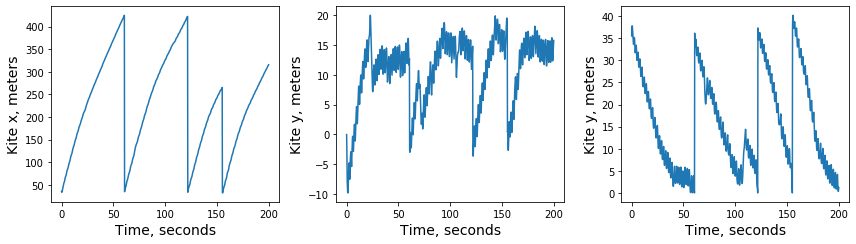

In [38]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,3.5))

ax1.set_xlabel('Time, seconds', fontsize=14)
ax1.set_ylabel('Kite x, meters', fontsize=14)
ax1.plot(xs, traj_x)

ax2.set_xlabel('Time, seconds', fontsize=14)
ax2.set_ylabel('Kite y, meters', fontsize=14)
ax2.plot(xs, traj_y)

ax3.set_xlabel('Time, seconds', fontsize=14)
ax3.set_ylabel('Kite y, meters', fontsize=14)
ax3.plot(xs, traj_z)

plt.tight_layout()
plt.savefig(plot_dir+"eval_traj.png", dpi=200)